Text(0.5, 1.0, 'Plot of Points')

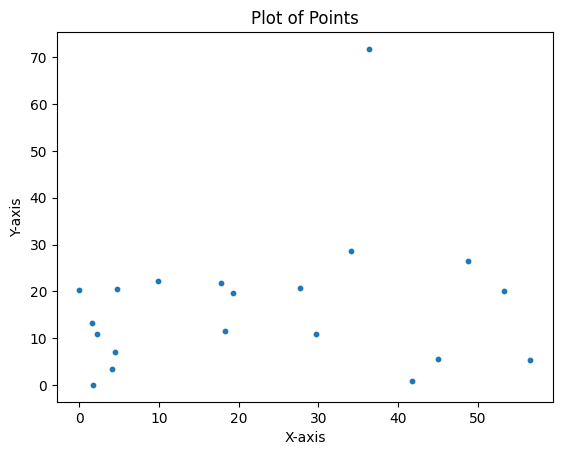

In [3]:

import random 
import matplotlib.pyplot as plt

point_list = []
num_of_pts = 20

for i in range(num_of_pts):
    point_list.append({
        "x": random.random()*random.randint(0, 100),
        "y": random.random()*random.randint(0, 100)
    })

# Plotting on the XY plane
x_values = []
y_values = []
for each_point in point_list:
    x_values.append(each_point["x"])
    y_values.append(each_point["y"])

plt.scatter(x_values, y_values, s=10)
    
# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points')

Final pair = ({'x': 1.5613313112269955, 'y': 13.216555007779734}, {'x': 2.201300641466815, 'y': 10.932515351398187})
Final dist = 2.372002929081483


Text(0.5, 1.0, 'Plot of Points')

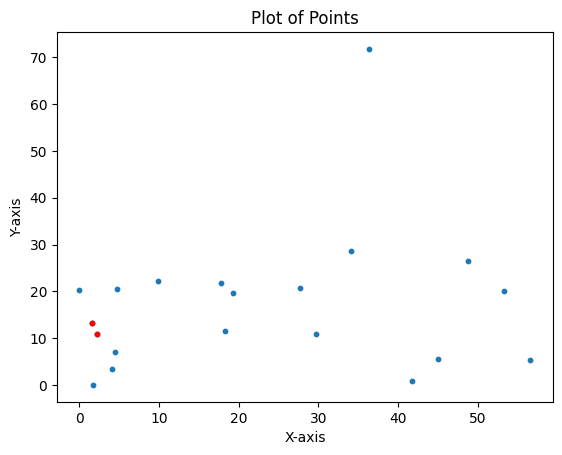

In [8]:
import random
import math
import hashlib


def get_distance(p1, p2):
    return math.sqrt((p1["x"] - p2["x"])**2 + (p1["y"] - p2["y"])**2)


def generate_hash(point):
    point_str = str(point).encode('utf-8')
    hash_object = hashlib.md5(point_str)
    return hash_object.hexdigest()


def get_smallest_dist(point, points):
    min_dist = float('inf')
    for each_point in points:
        if each_point != point:
            temp_dist = get_distance(point, each_point)
            if temp_dist < min_dist:
                min_dist = temp_dist
    return min_dist


def build_hash_list(points):
    hash_to_point = {}
    for point in points:
        point_hash = generate_hash(point)
        hash_to_point[point_hash] = point
    return hash_to_point


def build_mesh(points, cell_size):
    max_x = max(d["x"] for d in points)
    min_x = min(d["x"] for d in points)
    max_y = max(d["y"] for d in points)
    min_y = min(d["y"] for d in points)

    num_rows = int((max_x - min_x)/cell_size) + 1
    num_cols = int((max_y - min_y)/cell_size) + 1

    mesh = [[None for _ in range(num_cols + 1)] for _ in range(num_rows + 1)]
    points_to_mesh = {}
    for point in points:
        row = int((point["x"] - min_x)/cell_size)
        col = int((point["y"] - min_y)/cell_size)
        point_hash = generate_hash(point)
        mesh[row][col] = point_hash
        points_to_mesh[point_hash] = row, col
    return mesh, points_to_mesh


def get_closest_pair(points):
    temp_list = list(points)
    final_smallest_dist = float('inf')
    hash_to_point = build_hash_list(points)
    while len(temp_list) > 0:
        rand_point = random.choice(temp_list)
        smallest_dist = get_smallest_dist(rand_point, temp_list)
        final_smallest_dist = smallest_dist
        cell_size = smallest_dist/3
        mesh, points_to_mesh = build_mesh(temp_list, cell_size)

        # get the isolated points from the mesh for each iteration
        isolated_points = []
        for point in temp_list:
            point_hash = generate_hash(point)
            neighbor_found = False
            row, col = points_to_mesh[point_hash]
            for drow in [-1, 0, 1]:
                break_flag = False
                for dcol in [-1, 0, 1]:
                    if mesh[row + drow][col + dcol] is not None:
                        if drow == 0 and dcol == 0:
                            continue
                        neighbor_found = True
                        break_flag = True
                        break
                if break_flag == True:
                    break
            if neighbor_found == False:
                isolated_points.append(point)
        for point in isolated_points:
            temp_list.remove(point)

    # build the final mesh with cell size = final_smallest_dist
    mesh, points_to_mesh = build_mesh(points, final_smallest_dist)
    # find the smallest pair among all neighborhoods
    final_pair = None
    final_dist = float('inf')
    for point in points:
        point_hash = generate_hash(point)
        row, col = points_to_mesh[point_hash]
        for drow in [-1, 0, 1]:
            for dcol in [-1, 0, 1]:
                if mesh[row + drow][col + dcol] is not None:
                    if drow == 0 and dcol == 0:
                        continue
                    neighbor_point_hash = mesh[row + drow][col + dcol]
                    neighbor_point = hash_to_point[neighbor_point_hash]
                    temp_dist = get_distance(neighbor_point, point)
                    if temp_dist < final_dist:
                        final_dist = temp_dist
                        final_pair = point, neighbor_point
    return final_pair, final_dist

final_pair, final_dist = get_closest_pair(point_list)
p1, p2 = final_pair
print("Final pair =", final_pair)
print("Final dist =", final_dist)

# Plotting on the XY plane
plt.scatter(x_values, y_values, s=10)
plt.scatter([p1["x"], p2["x"]], [p1["y"], p2["y"]], s=10, color='red') 

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points')

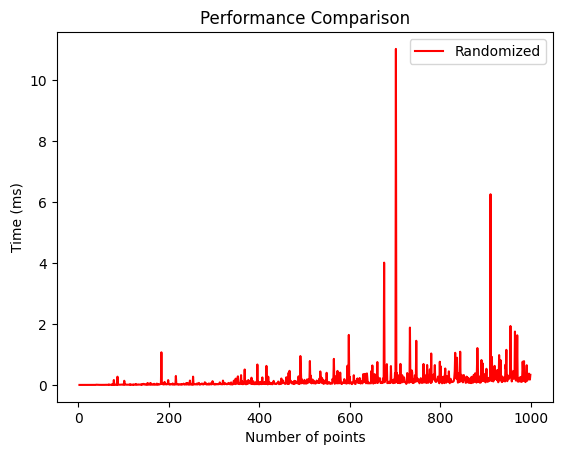

In [10]:
import time
rand_input = []
rand_time = []
test_cases = 1000
for num_of_pts in range(3, test_cases):
    rand_input.append(num_of_pts)
    test_pts = []
    for i in range(num_of_pts):
        test_pts.append({
            "x": random.random()*random.randint(0, 100),
            "y": random.random()*random.randint(0, 100)
        })

    start_time = time.perf_counter()
    get_closest_pair(test_pts)
    end_time = time.perf_counter()
    time_function_1 = end_time - start_time
    rand_time.append(time_function_1)

plt.plot(rand_input, rand_time, color="red", label="Randomized")
# plt.plot(dnq_input, dnq_time, color="blue", label="Divide & Conquer")

plt.title("Performance Comparison")
plt.xlabel("Number of points")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()